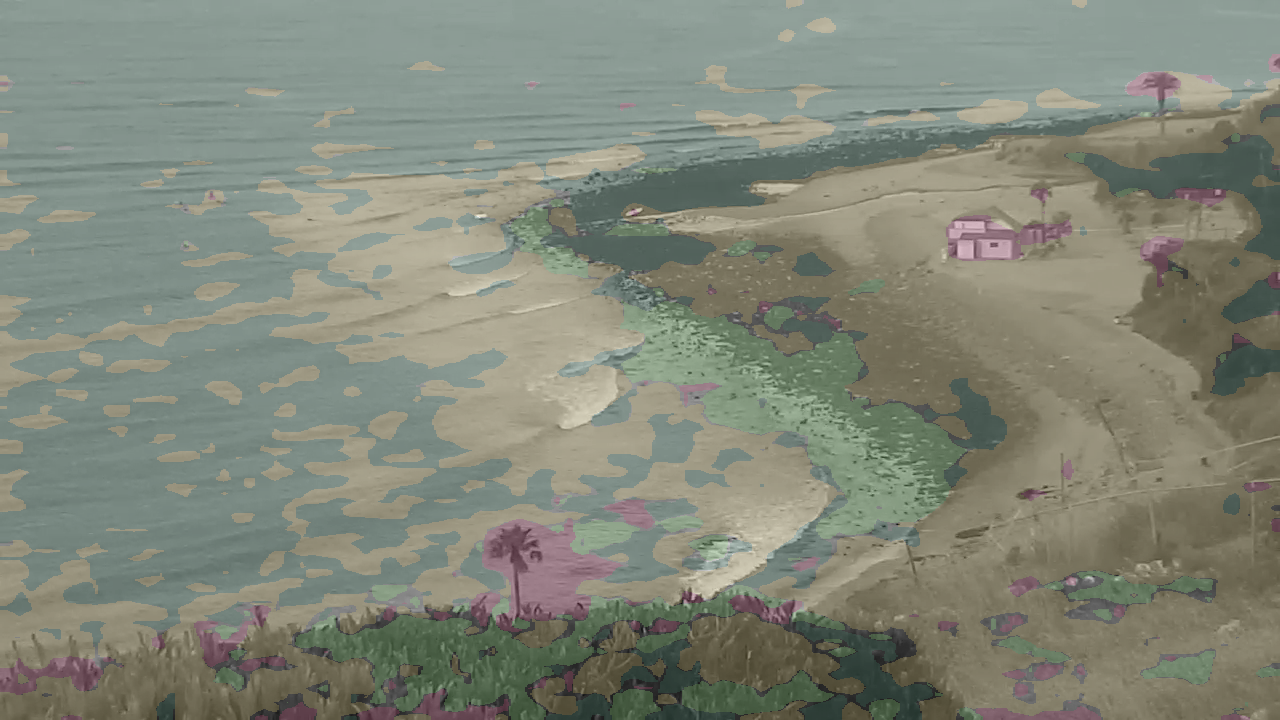

KeyboardInterrupt: 

[tls @ 0x7fe493464240] Error in the pull function.
[tls @ 0x7fe493464240] IO error: Operation timed out
[tls @ 0x7fe4935d19c0] Error in the pull function.
[tls @ 0x7fe4935d19c0] IO error: Operation timed out
[h264 @ 0x7fe493b0e080] dquant out of range (94208) at 71 6
[h264 @ 0x7fe493b0e080] error while decoding MB 71 6
[tls @ 0x7fe4c4531680] Error in the pull function.
[tls @ 0x7fe4c4531680] IO error: Connection reset by peer
[tls @ 0x7fe482f8cb00] Error in the pull function.
[tls @ 0x7fe482f8cb00] IO error: End of file
[https @ 0x7fe482f785c0] Stream ends prematurely at 1178876, should be 2647604
[tls @ 0x7fe482f8cb00] The specified session has been invalidated for some reason.
[h264 @ 0x7fe493b0e080] dquant out of range (104) at 63 44
[h264 @ 0x7fe493b0e080] error while decoding MB 63 44
[tcp @ 0x7fe48311ac80] Failed to resolve hostname edge01.london.nginx.hdontap.com: nodename nor servname provided, or not known
[tcp @ 0x7fe482f9e600] Failed to resolve hostname edge01.london.nginx.h

In [1]:
from landingai.predict import Predictor
from landingai.vision_pipeline import NetworkedCamera

stream_url = "https://live.hdontap.com/hls/hosb1/topanga_swellmagnet.stream/playlist.m3u8"


_CAPTURE_INTERVAL = None # In milliseconds. Set to None if you want to capture at the max prediction rate
api_key = "v7b0hdyfj6271xy2o9lmiwkkcbdpvt1"
api_secret = "ao6yjcju7q1e6u0udgwrgknhrx6m4n1o48z81jy6huc059gne047l4fq3u1cgq"
endpoint_id = "63035608-9d24-4342-8042-e4b08e084fde"  # cloud model
# endpoint_id = "45b0b6b5-4c04-41a2-a3de-26cb20e4e4a3"

surfer_model = Predictor(endpoint_id, api_key, api_secret)
Camera = NetworkedCamera(
    stream_url, capture_interval=_CAPTURE_INTERVAL
)

for i,frame in enumerate(Camera):
    if i>=10: # Do only 10 frames
        break
    (
        # frame.show_image(clear_nb_cell=True)
        frame.run_predict(predictor=surfer_model)
        .overlay_predictions()
        .show_image(image_src="overlay", clear_nb_cell=True)        
    )
